In [6]:
#Importa as libs
from qiskit import QuantumCircuit, transpile #Classe para criar e manipular circuitos quânticos
from qiskit_aer import Aer #Módulo para simulação de circuitos quânticos
from qiskit.visualization import plot_histogram #Função para plotar histogramas
from qiskit.circuit.library import GroverOperator
import matplotlib.pyplot as plt #Biblioteca para plotar gráficos

In [7]:
#Defina o numero de bits da chave
n_bits = 4 #Número de bits da chave

In [8]:
#Chave secreta para testar
chave_secreta = '1010' #Chave secreta de 4 bits

In [9]:
#Função para criar o operador de Grover com base na chave secreta
def criar_oracle(chave_secreta):
    n = len(chave_secreta) #Número de bits
    oracle = QuantumCircuit(n) #Cria um circuito quântico com n qubits
    for i, bit in enumerate(chave_secreta):
        if bit == '0':
            oracle.x(i)
    oracle.mcx(list(range(n-1)), n-1) #Aplica a porta de controle múltiplo (MCX) para inverter o estado
    for i, bit in enumerate(chave_secreta):
        if bit == '0':
            oracle.x(i)
    return oracle #Retorna o circuito do oracle

In [10]:
#Cria o circuito de Grover
oracle = criar_oracle(chave_secreta) #Cria o oracle com a chave secreta
grover_op = GroverOperator(oracle) #Cria o operador de Grover com o oracle

In [12]:
#Inicia o circuito quântico
qc = QuantumCircuit(n_bits) #Cria um circuito quântico com n_bits qubits
qc.h(range(n_bits)) #Aplica a porta Hadamard em todos os qubits
qc.append(grover_op, range(n_bits)) #Aplica o operador de Grover
qc.measure_all() #Mede todos os qubits

In [13]:
#Transpila o circuito quântico para o simulador
simulador = Aer.get_backend('aer_simulator') #Define o backend de simulação
qc_transpiled = transpile(qc, backend=simulador) #Transpila o circuito para o backend

In [14]:
#Executa o circuito quântico
resultado = simulador.run(qc_transpiled, shots=1024).result() #Executa o circuito com 1024 shots
contagens  = resultado.get_counts() #Obtém as contagens dos resultados

Resultados:
{'1101': 54, '1100': 59, '1110': 57, '1000': 54, '0001': 75, '1001': 70, '0110': 77, '0111': 62, '1010': 65, '1011': 77, '0011': 61, '1111': 77, '0101': 60, '0010': 59, '0000': 60, '0100': 57}


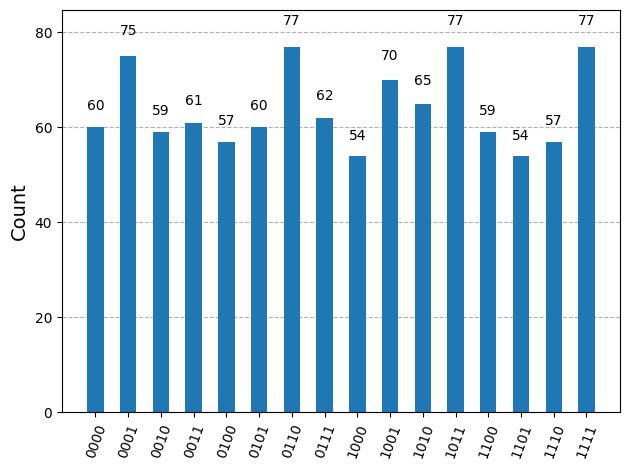

In [15]:
#Exibe os resultados
print("Resultados:")
print(contagens) #Imprime as contagens dos resultados
plot_histogram(contagens) #Plota um histograma com os resultados

In [ ]:
#Esse código implementa uma simulação do circuito quantico com algoritmo de Grover. Buscando uma chave criptográfica específica num espaço de chaves.